In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
#import lstm #helper libraries
import time
import warnings
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt

#warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
# def normalise_windows(window_data):
#     normalised_data = []
#     for window in window_data:
#         normalised_window = [((float(p) / (float(window[0]))) - 1) for p in window]
#         normalised_data.append(normalised_window)
#     return normalised_data

def normalise_windows2(window_data):
    normalised_data = []
    maximos = []
    for window in window_data:
        for i in range(len(window)):
            window[i] = float(window[i])
        maximos.append(max(window))
        #normalised_window = [((float(p) / (float(max(window)))) - 1) for p in window]
        #normalised_window = [((float(p) / (float(max(maximos)))) - 1) for p in window]
        normalised_window = [((float(p) / (float(max(maximos))))-0.5)  for p in window]
        # print("window", window)
        # print("max_window", max(window))
        
        normalised_data.append(normalised_window)
    #print(maximos)
    return normalised_data, maximos

In [3]:
def load_data(filename, seq_len, normalise_window):
    
    f = open(filename, 'r').read()
    data = f.split('\n')
    #print(data)

    sequence_length = seq_len + 1
    result = []
    result_raw = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
        result_raw.append(data[index: index + sequence_length])
    
#     print(max(result))
#     print(min(result))
    max_vals = []
    #result = result.astype(int)
    #print(result)

    if normalise_window:
        result, max_vals = normalise_windows2(result)
        #print(max_vals)

    result = np.array(result)
    result_raw = np.array(result_raw)
    
    print('result shape', result.shape)
    print ("result type", result.dtype)
    

    row = round(0.9 * result.shape[0])
#     print("row", row)
#     if normalise_window:
#         print("max val test", max_vals[row])
        
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]
    
    data_y_test = result_raw[int(row):, -1]
    
    max_y_test  = max_vals

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    return [x_train, y_train, x_test, y_test, data_y_test]

In [4]:
#Step 1 Load Data
#X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)
X_train, y_train, X_test, y_test, data_y_test = load_data('m1.csv', 7, True)

result shape (237, 8)
result type float64


In [5]:
# print("y_test", len(y_test))
# print("data_y_test", len(data_y_test))

In [6]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_shape=(None,1),
    units=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

# model.add(Dense(
#     output_dim=256))
# model.add(Activation('linear'))

model.add(Dense(
    units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mae', optimizer='adam')
print( 'compilation time : ', time.time() - start)

compilation time :  0.04721212387084961


In [7]:
## Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=64,
    nb_epoch=200,
    validation_split=0.15)

/Users/pedrobirmann/anaconda/envs/keras_env_test/lib/python3.5/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 181 samples, validate on 32 samples
Epoch 1/200
181/181 [==============================] - 2s 13ms/step - loss: 0.2040 - val_loss: 0.1906
Epoch 2/200
181/181 [==============================] - 0s 510us/step - loss: 0.2025 - val_loss: 0.1887
Epoch 3/200
181/181 [==============================] - 0s 519us/step - loss: 0.2015 - val_loss: 0.1895
Epoch 4/200
181/181 [==============================] - 0s 513us/step - loss: 0.2009 - val_loss: 0.1887
Epoch 5/200
181/181 [==============================] - 0s 557us/step - loss: 0.1993 - val_loss: 0.1900
Epoch 6/200
181/181 [==============================] - 0s 638us/step - loss: 0.1978 - val_loss: 0.1898
Epoch 7/200
181/181 [==============================] - 0s 496us/step - loss: 0.1943 - val_loss: 0.1883
Epoch 8/200
181/181 [==============================] - 0s 541us/step - loss: 0.1917 - val_loss: 0.1865
Epoch 9/200
181/181 [==============================] - 0s 483us/step - loss: 0.1890 - val_loss: 0.1863
Epoch 10/200
181/181 [=======

181/181 [==============================] - 0s 628us/step - loss: 0.1443 - val_loss: 0.1444
Epoch 80/200
181/181 [==============================] - 0s 585us/step - loss: 0.1387 - val_loss: 0.1532
Epoch 81/200
181/181 [==============================] - 0s 578us/step - loss: 0.1446 - val_loss: 0.1546
Epoch 82/200
181/181 [==============================] - 0s 544us/step - loss: 0.1421 - val_loss: 0.1506
Epoch 83/200
181/181 [==============================] - 0s 517us/step - loss: 0.1416 - val_loss: 0.1454
Epoch 84/200
181/181 [==============================] - 0s 610us/step - loss: 0.1443 - val_loss: 0.1498
Epoch 85/200
181/181 [==============================] - 0s 707us/step - loss: 0.1393 - val_loss: 0.1563
Epoch 86/200
181/181 [==============================] - 0s 716us/step - loss: 0.1410 - val_loss: 0.1511
Epoch 87/200
181/181 [==============================] - 0s 602us/step - loss: 0.1419 - val_loss: 0.1475
Epoch 88/200
181/181 [==============================] - 0s 791us/step - loss:

181/181 [==============================] - 0s 609us/step - loss: 0.1398 - val_loss: 0.1412
Epoch 158/200
181/181 [==============================] - 0s 695us/step - loss: 0.1378 - val_loss: 0.1417
Epoch 159/200
181/181 [==============================] - 0s 582us/step - loss: 0.1387 - val_loss: 0.1363
Epoch 160/200
181/181 [==============================] - 0s 757us/step - loss: 0.1347 - val_loss: 0.1375
Epoch 161/200
181/181 [==============================] - 0s 663us/step - loss: 0.1330 - val_loss: 0.1339
Epoch 162/200
181/181 [==============================] - 0s 665us/step - loss: 0.1389 - val_loss: 0.1390
Epoch 163/200
181/181 [==============================] - 0s 577us/step - loss: 0.1396 - val_loss: 0.1368
Epoch 164/200
181/181 [==============================] - 0s 665us/step - loss: 0.1364 - val_loss: 0.1332
Epoch 165/200
181/181 [==============================] - 0s 622us/step - loss: 0.1357 - val_loss: 0.1320
Epoch 166/200
181/181 [==============================] - 0s 518us/ste

In [8]:
def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

In [9]:
def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #print ('yo')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

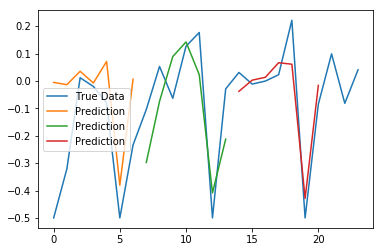

In [10]:
#Step 4 - Plot the predictions!
predictions = predict_sequences_multiple(model, X_test, 7, 7)
plot_results_multiple(predictions, y_test, 7)

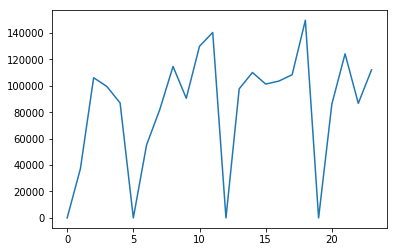

In [11]:
data_y_test = data_y_test.astype(int)

plt.plot(data_y_test)
# plt.ylabel('some numbers')
plt.show()


In [12]:
#y_test

array([ -5.00000000e-01,  -3.20521848e-01,   1.17343494e-02,
        -2.02228224e-02,  -8.04282820e-02,  -5.00000000e-01,
        -2.33495708e-01,  -1.04210476e-01,   5.29227356e-02,
        -6.32632391e-02,   1.26526478e-01,   1.76786920e-01,
        -5.00000000e-01,  -2.88993923e-02,   3.08816437e-02,
        -1.14642616e-02,  -4.72653612e-04,   2.27307804e-02,
         2.21529854e-01,  -5.00000000e-01,  -8.49811903e-02,
         9.89727018e-02,  -8.17546060e-02,   4.05179898e-02])

In [13]:
#data_y_test

array([     0,  37213, 106103,  99477,  86994,      0,  55257,  82063,
       114643,  90553, 129904, 140325,      0,  97678, 110073, 101293,
       103572, 108383, 149602,      0,  86050, 124191,  86719, 112071])

In [14]:
# for i in range(len(y_test)):
#     y_test[i] = y_test[i]+1
    
# y_test

In [15]:
# for i in range(len(y_test)):
#     y_test[i] = y_test[i]*81564
    
# y_test